In [2]:
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
import pandas as pd
import os

In [3]:
df = pd.read_csv("../data/cc_outliers_dataset.csv")
df.head()

,ID,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS,STATUS
0,5008804,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,1
1,5008805,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2,1
2,5008806,1,1,1,0,112500,4,4,1,1,21474,1134,1,0,0,0,2,0
3,5008808,0,0,1,0,270000,0,4,3,1,19110,3051,1,0,1,1,1,0
4,5008809,0,0,1,0,270000,0,4,3,1,19110,3051,1,0,1,1,1,0


In [15]:
target = df["STATUS"]
target_names = ["approved", "approved", "rejected", "rejected", "rejected", "rejected"]
target.head()

0    1
1    1
2    0
3    0
4    0
Name: STATUS, dtype: int64

In [5]:
data = df.drop(["STATUS", "ID"], axis=1)
feature_names = data.columns
data.head()

,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,NAME_EDUCATION_TYPE,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,CNT_FAM_MEMBERS
0,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2
1,1,1,1,0,427500,4,1,0,4,12005,4542,1,1,0,0,2
2,1,1,1,0,112500,4,4,1,1,21474,1134,1,0,0,0,2
3,0,0,1,0,270000,0,4,3,1,19110,3051,1,0,1,1,1
4,0,0,1,0,270000,0,4,3,1,19110,3051,1,0,1,1,1


In [6]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(data, target, random_state=42)


In [7]:
from sklearn.preprocessing import StandardScaler

# Create a StandardScater model and fit it to the training data

X_scaler = StandardScaler().fit(X_train)

In [8]:
# Transform the training and testing data using the X_scaler and y_scaler models

X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

k:1, Train/Test Score: 0.919/0.850
k:3, Train/Test Score: 0.908/0.874
k:5, Train/Test Score: 0.900/0.874
k:7, Train/Test Score: 0.893/0.876
k:9, Train/Test Score: 0.890/0.878
k:11, Train/Test Score: 0.889/0.879
k:13, Train/Test Score: 0.886/0.880
k:15, Train/Test Score: 0.884/0.880
k:17, Train/Test Score: 0.883/0.880
k:19, Train/Test Score: 0.882/0.881


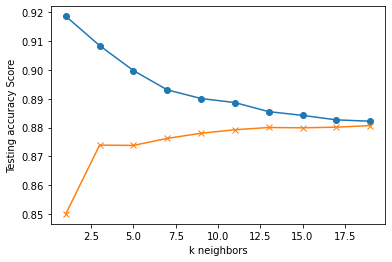

In [10]:
# Loop through different k values to see which has the highest accuracy
train_scores = []
test_scores = []
for k in range(1,20,2):
    knn=KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train_scaled, y_train)
    train_score = knn.score(X_train_scaled, y_train)
    test_score = knn.score(X_test_scaled, y_test)
    train_scores.append(train_score)
    test_scores.append(test_score)
    print(f"k:{k}, Train/Test Score: {train_score:.3f}/{test_score:.3f}")
    
    
plt.plot(range(1, 20, 2), train_scores, marker='o')
plt.plot(range(1, 20, 2), test_scores, marker="x")
plt.xlabel("k neighbors")
plt.ylabel("Testing accuracy Score")
plt.show()

In [9]:
# Choose the best k from above and re-fit the KNN Classifier using that k value.
# print the score for the test data
knn = KNeighborsClassifier(n_neighbors=19)
knn.fit(X_train_scaled, y_train)
print('k=19 Test Acc: %.3f' % knn.score(X_test_scaled, y_test))

k=19 Test Acc: 0.881


In [16]:
from sklearn.metrics import classification_report
prediction = knn.predict(X_test) 
print(classification_report(prediction, y_test, target_names = target_names))

              precision    recall  f1-score   support

    approved       1.00      0.88      0.94      8995
    approved       0.00      0.00      0.00         0
    rejected       0.00      0.00      0.00         0
    rejected       0.00      0.00      0.00         0
    rejected       0.00      0.00      0.00         0
    rejected       0.00      0.00      0.00         0

    accuracy                           0.88      8995
   macro avg       0.17      0.15      0.16      8995
weighted avg       1.00      0.88      0.94      8995



C:\Users\cravi\anaconda3\envs\file--adv_python_requirements_windows.txt\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cravi\anaconda3\envs\file--adv_python_requirements_windows.txt\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\cravi\anaconda3\envs\file--adv_python_requirements_windows.txt\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this beh